# Step 1. Base model

In [100]:
import numpy as np
import tensorflow as tf

from matplotlib import pyplot as plt
from keras.datasets import fashion_mnist
from typing import Dict, Any

import random

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

In [154]:
# Load data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

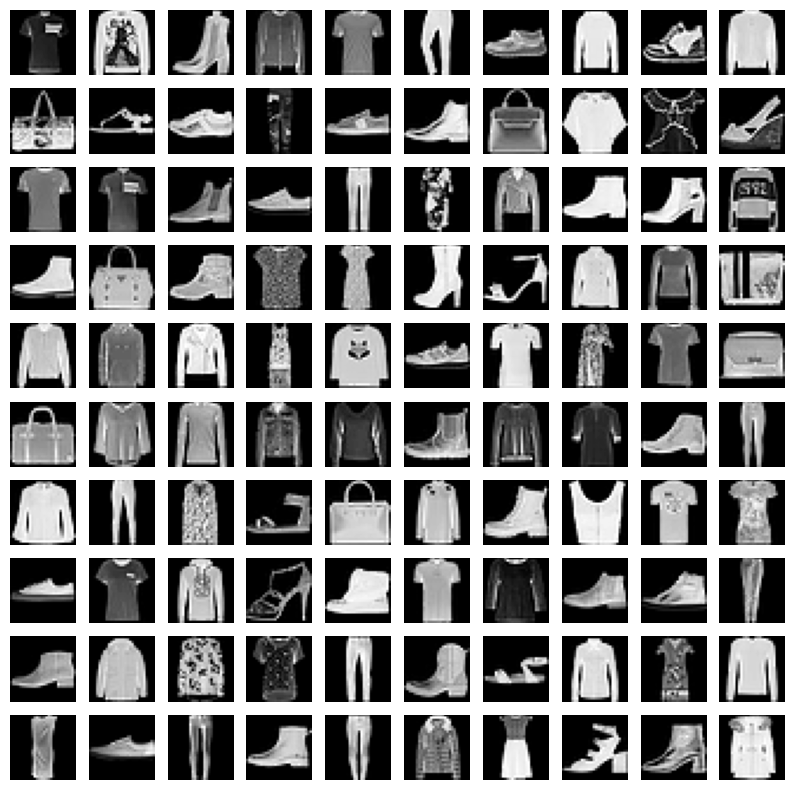

In [59]:
# Display some examples
random_indices = random.sample(range(len(y_train)), 100)  

plt.figure(figsize=(10, 10))

for i, idx in enumerate(random_indices):
    plt.subplot(10, 10, i + 1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.axis("off")

plt.show()

In [157]:
from matplotlib.backends.backend_pdf import PdfPages

# Class labels for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Set grid size
rows, cols = 5, 5
num_images = rows * cols

# Select random images
indices = np.random.choice(len(X_train), num_images, replace=False)
images = X_train[indices]
labels = y_train[indices]

# Create figure
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')
    ax.set_title(class_names[int(labels[i])])  # Correct indexing
    ax.axis('off')

# Adjust layout
plt.tight_layout()

# Save to PDF
pdf_filename = "images/fashion_mnist_grid.pdf"
with PdfPages(pdf_filename) as pdf:
    pdf.savefig(fig, bbox_inches="tight")  # Save without cutting labels
    plt.close(fig)

print(f"Grid of images saved as {pdf_filename}")

Grid of images saved as images/fashion_mnist_grid.pdf


In [60]:
# convert to one-hot-encoding
classes_number = 10

y_train = tf.keras.utils.to_categorical(y_train, classes_number)
y_test = tf.keras.utils.to_categorical(y_test, classes_number)

print("Shape of y_train: {}".format(y_train.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of y_train: (60000, 10)
Shape of y_test: (10000, 10)


In [61]:
# Create the test model
base_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28,28,1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dense(10, activation='softmax')
])

base_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_27 (Dense)            (None, 100)               78500     
                                                                 
 batch_normalization_6 (Bat  (None, 100)               400       
 chNormalization)                                                
                                                                 
 re_lu_1 (ReLU)              (None, 100)               0         
                                                                 
 dense_28 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79910 (312.15 KB)
Trainable params: 79710 (311.37 KB)
Non-trainable params: 200 (800.00 Byte)
___________

In [62]:
# Define loss and optimizer
optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=0.001, momentum=0.9)

base_model.compile(loss = "categorical_crossentropy",
             optimizer = optimizer,
             metrics = ["accuracy"])

In [63]:
history = base_model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=128,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/100
469/469 [==============================] - 1s 2ms/step - loss: 0.8450 - accuracy: 0.7248 - val_loss: 0.6374 - val_accuracy: 0.7899
Epoch 2/100
469/469 [==============================] - 1s 1ms/step - loss: 0.5596 - accuracy: 0.8121 - val_loss: 0.5363 - val_accuracy: 0.8152
Epoch 3/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4985 - accuracy: 0.8295 - val_loss: 0.4988 - val_accuracy: 0.8258
Epoch 4/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4646 - accuracy: 0.8400 - val_loss: 0.4805 - val_accuracy: 0.8325
Epoch 5/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4407 - accuracy: 0.8482 - val_loss: 0.4608 - val_accuracy: 0.8400
Epoch 6/100
469/469 [==============================] - 1s 1ms/step - loss: 0.4245 - accuracy: 0.8527 - val_loss: 0.4510 - val_accuracy: 0.8456
Epoch 7/100
469/469 [==============================] - 1s 1ms/step - loss: 0.4105 - accuracy: 0.8578 - val_loss: 0.4487 - val_accuracy: 0.8419

Epoch 58/100
469/469 [==============================] - 1s 1ms/step - loss: 0.2258 - accuracy: 0.9228 - val_loss: 0.3437 - val_accuracy: 0.8820
Epoch 59/100
469/469 [==============================] - 1s 1ms/step - loss: 0.2249 - accuracy: 0.9218 - val_loss: 0.3486 - val_accuracy: 0.8774
Epoch 60/100
469/469 [==============================] - 1s 1ms/step - loss: 0.2222 - accuracy: 0.9228 - val_loss: 0.3445 - val_accuracy: 0.8779
Epoch 61/100
469/469 [==============================] - 1s 1ms/step - loss: 0.2201 - accuracy: 0.9234 - val_loss: 0.3416 - val_accuracy: 0.8810
Epoch 62/100
469/469 [==============================] - 1s 1ms/step - loss: 0.2181 - accuracy: 0.9252 - val_loss: 0.3457 - val_accuracy: 0.8795
Epoch 63/100
469/469 [==============================] - 1s 1ms/step - loss: 0.2166 - accuracy: 0.9249 - val_loss: 0.3433 - val_accuracy: 0.8836
Epoch 64/100
469/469 [==============================] - 1s 2ms/step - loss: 0.2153 - accuracy: 0.9261 - val_loss: 0.3424 - val_accuracy:

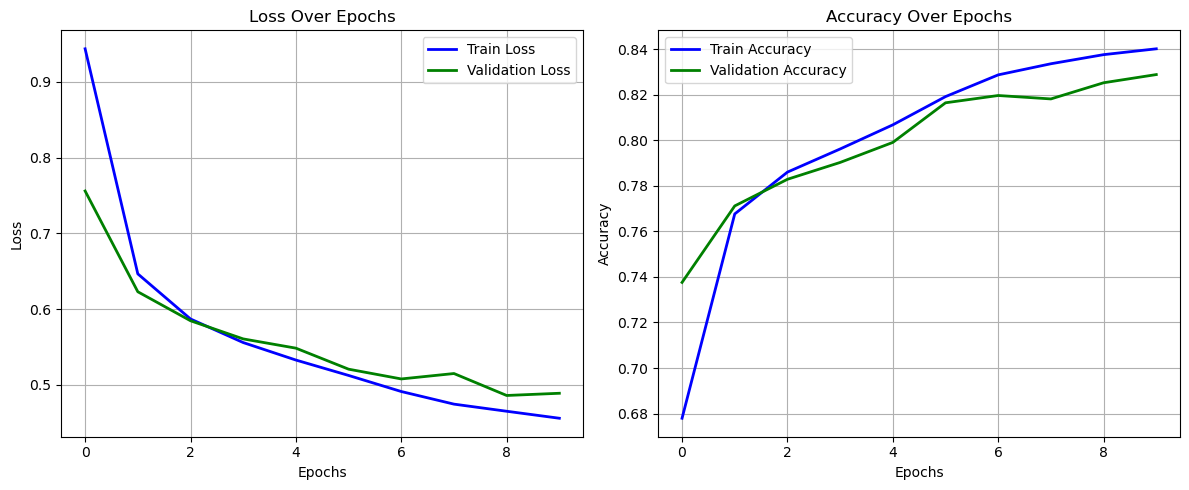

In [70]:
def show_history(history) -> None:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Loss Graph
    ax1.plot(history.history["loss"], label="Train Loss", color='blue', linewidth=2.0)
    ax1.plot(history.history["val_loss"], label="Validation Loss", color='g', linewidth=2.0)
    ax1.set_title("Loss Over Epochs")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")
    ax1.legend()
    ax1.grid(True)

    # Accuracy Graph
    ax2.plot(history.history["accuracy"], label="Train Accuracy", color='blue', linewidth=2.0)
    ax2.plot(history.history["val_accuracy"], label="Validation Accuracy", color='g', linewidth=2.0)
    ax2.set_title("Accuracy Over Epochs")
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()
    
show_history(history)

# 2. Step 2. ED Layer

In [141]:
def ed_model(hidden_units: int) -> tf.keras.models.Model:
    return tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(28,28,1)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(hidden_units, activation='relu'),
        tf.keras.layers.Dense(100, activation=None),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

#hidden_units_range = [2, 5, 10, 20, 50]

histories: Dict[str, Any] = {}

for hidden_units in [5, 10, 15, 20, 30, 40, 50, 55, 60, 65, 70, 75, 80]:
    model = ed_model(hidden_units=hidden_units)
    model.compile(loss = "categorical_crossentropy",
                  optimizer = optimizer,
                  metrics = ["accuracy"])
    
    history = model.fit(
        X_train,
        y_train,
        epochs=100,
        batch_size=128,
        validation_data=(X_test, y_test),
        verbose=0
    )
    #show_history(history)
    histories[hidden_units] = history
    print(f'processed {hidden_units} hidden units plot')

processed 5 hidden units plot
processed 10 hidden units plot
processed 15 hidden units plot
processed 20 hidden units plot
processed 30 hidden units plot
processed 40 hidden units plot
processed 50 hidden units plot
processed 55 hidden units plot
processed 60 hidden units plot
processed 65 hidden units plot
processed 70 hidden units plot
processed 75 hidden units plot
processed 80 hidden units plot


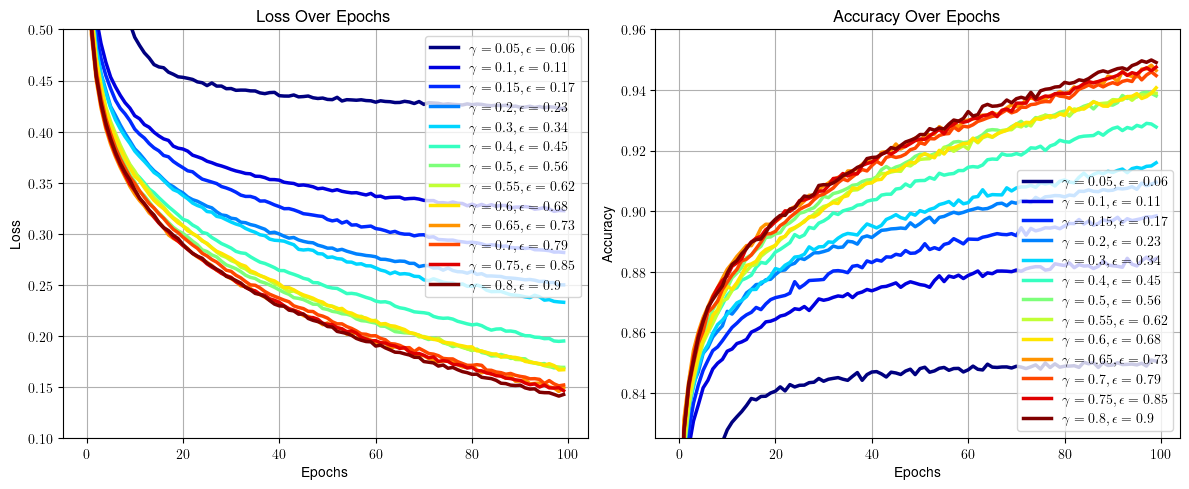

In [146]:
# First, plot different training plots for each hidden unit
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Loss Graph
cmap = plt.get_cmap('jet')
colors = [cmap(i) for i in np.linspace(0, 1, len(histories.items()))]

for i, (hidden_unit, history) in enumerate(histories.items()):
    params_num_after = 884 * hidden_unit
    params_num_before = 78400
    epsilon = params_num_after / params_num_before
    epsilon = str(round(epsilon, 2))
    gamma = hidden_unit / 100
    gamma = str(round(gamma, 2))
    
    ax1.plot(history.history["loss"], label=f"$\gamma = {gamma}, \epsilon = {epsilon}$", color=colors[i], linewidth=2.5)
    ax2.plot(history.history["accuracy"], label=f"$\gamma = {gamma}, \epsilon = {epsilon}$", color=colors[i], linewidth=2.5)

ax1.set_title("Loss Over Epochs")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.legend(loc='best')
ax1.grid(True)
ax1.set_ylim([0.1, 0.5])

ax2.set_title("Accuracy Over Epochs")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.legend(loc='best')
ax2.grid(True)
ax2.set_ylim([0.825, 0.96])

plt.tight_layout()
plt.show()

fig.savefig('images/accuracy_loss_over_epochs_3.svg', format='svg', dpi=600)
fig.savefig('images/accuracy_loss_over_epochs_3.pdf', format='pdf', dpi=600)

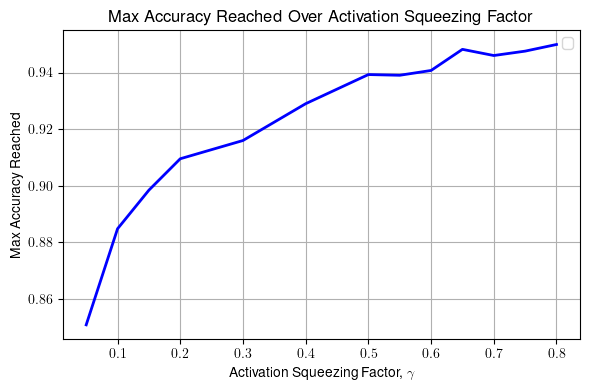

In [148]:
# Plot dependence of max accuracy on the chosen gamma parameter
points = []
for i, (hidden_unit, history) in enumerate(histories.items()):
    gamma = hidden_unit / 100
    max_accuracy = max(history.history["accuracy"])
    points.append((gamma, max_accuracy))
    
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot([point[0] for point in points], [point[1] for point in points], color='b', linewidth=2.0)
ax.set_title("Max Accuracy Reached Over Activation Squeezing Factor")
ax.set_xlabel("Activation Squeezing Factor, $\gamma$")
ax.set_ylabel("Max Accuracy Reached")
ax.legend(loc='best')
ax.grid(True)

plt.tight_layout()
plt.show()

fig.savefig('images/max_accuracy_over_squeeze.pdf', format='pdf', dpi=600)